In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv("/Users/Jackie/Desktop/df_encoded.csv")


In [66]:
from sklearn.model_selection import train_test_split
#create training data
#independent variable place of breach
X=data.iloc[:,14:19]
#dependent variable
y=data["Individuals_Affected"]
#split data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [67]:
from sklearn.ensemble import RandomForestRegressor

# Fitting Random Forest Regression to the dataset

regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X,y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [68]:
from sklearn.metrics import mean_squared_error

y_pred = regressor.predict(X)

mean_squared_error(y, y_pred)

60957714107.82635

Text(0, 0.5, 'Mean decrease in impurity')

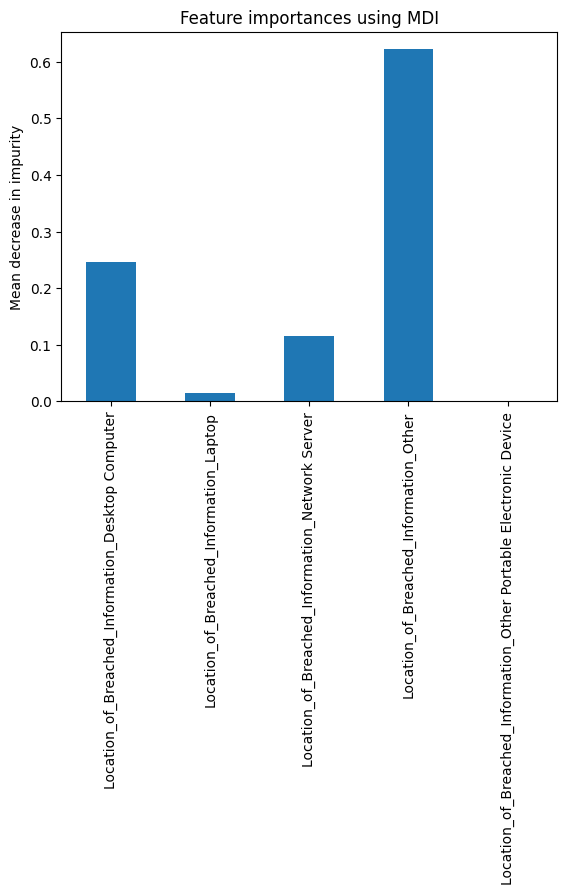

In [69]:
#get feature importance
feature_names = [f"feature {i}" for i in range(X.shape[1])]
importances = regressor.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)
#plot features
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
